#importing libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for inline plotting
%matplotlib inline 
# to ignore warnings
import warnings 
# Ignore all warnings
warnings.filterwarnings('ignore') 

In [6]:
df = pd.read_csv('data/stud.csv')

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

#Data checks to perform

In [13]:
# CHECK FOR MISSING VALUES
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

THERE IS NO ANY MISSING VALUE IN THIS DATA SET

In [14]:
#check for duplicate values
df.duplicated().sum()

0

THERE IS NO ANY Duplicate VALUE IN THIS DATA SET

In [15]:
# check data types
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [16]:
#check the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
#check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# INsight 

all mean are close to each other and std daviation is also close
mean range ->  (66-69.5)
std range -> (14-15.5)

In [ ]:
# number of unique values in each column
for col in df.columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Data type: {df[col].dtype}")
    print("-" * 40)

Column: gender
Unique values: ['female' 'male']
Number of unique values: 2
Data type: object
----------------------------------------
Column: race_ethnicity
Unique values: ['group B' 'group C' 'group A' 'group D' 'group E']
Number of unique values: 5
Data type: object
----------------------------------------
Column: parental_level_of_education
Unique values: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Number of unique values: 6
Data type: object
----------------------------------------
Column: lunch
Unique values: ['standard' 'free/reduced']
Number of unique values: 2
Data type: object
----------------------------------------
Column: test_preparation_course
Unique values: ['none' 'completed']
Number of unique values: 2
Data type: object
----------------------------------------
Column: math_score
Unique values: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  8

In [ ]:
# checking numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['math_score', 'reading_score', 'writing_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [26]:
#adding a two new columns called total and avg

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avgrage,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


# EDA

<Axes: xlabel='average', ylabel='Count'>

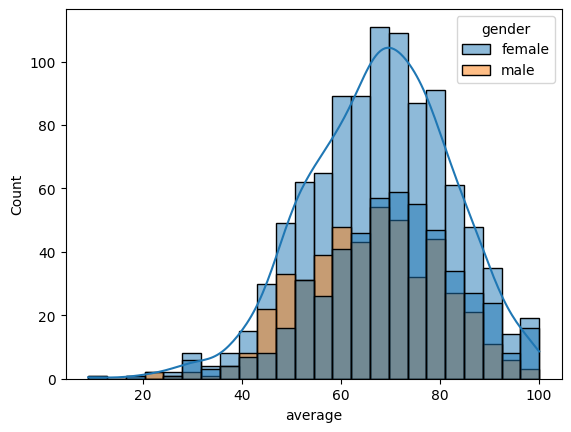

In [ ]:
# histogram and KDE
sns.histplot(df['average'], kde=True)
# avg hue = gender
sns.histplot(df, x='average', hue='gender')

# INsighT

females are getting good marks than males

<Axes: xlabel='average', ylabel='Count'>

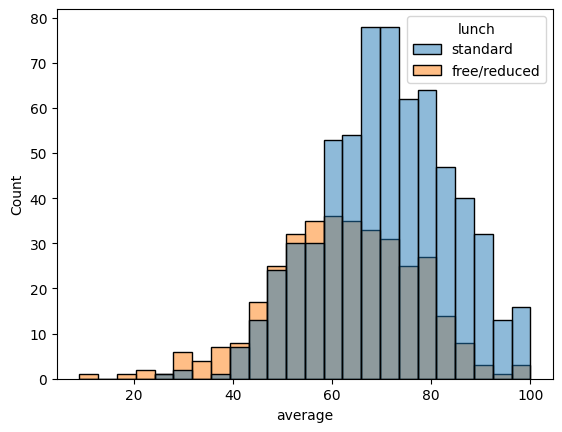

In [28]:
# on lunch
sns.histplot(df, x='average', hue='lunch')

STANDARD LUNCH HELPS TO GET GOOD MARKS

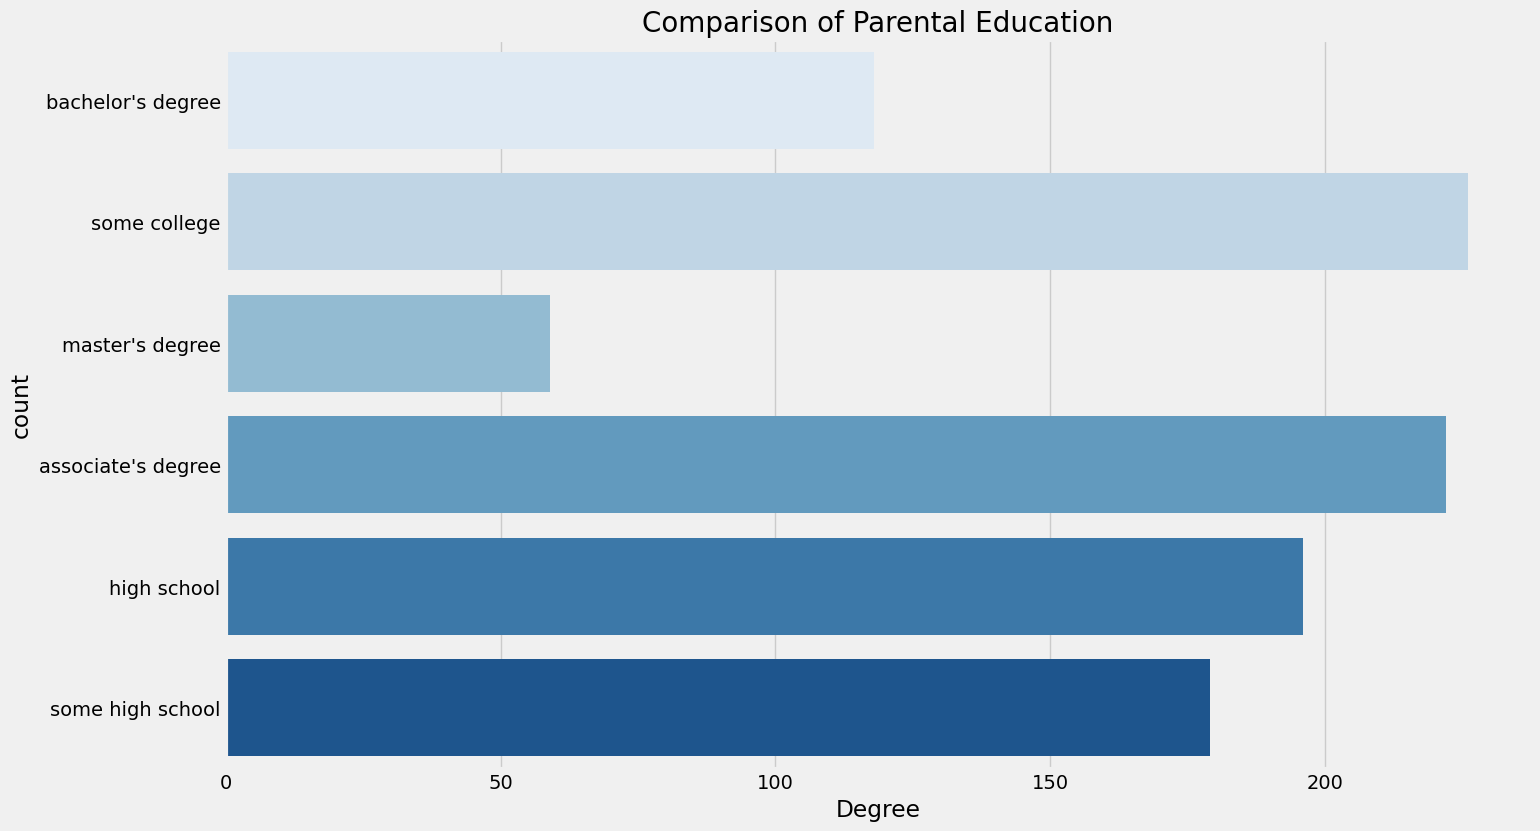

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

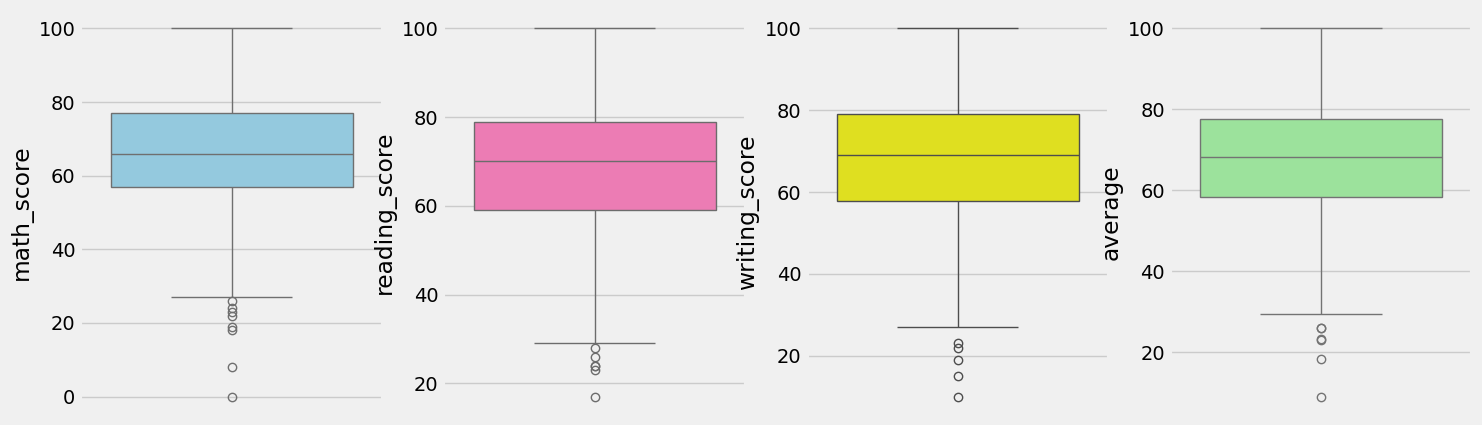

In [34]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

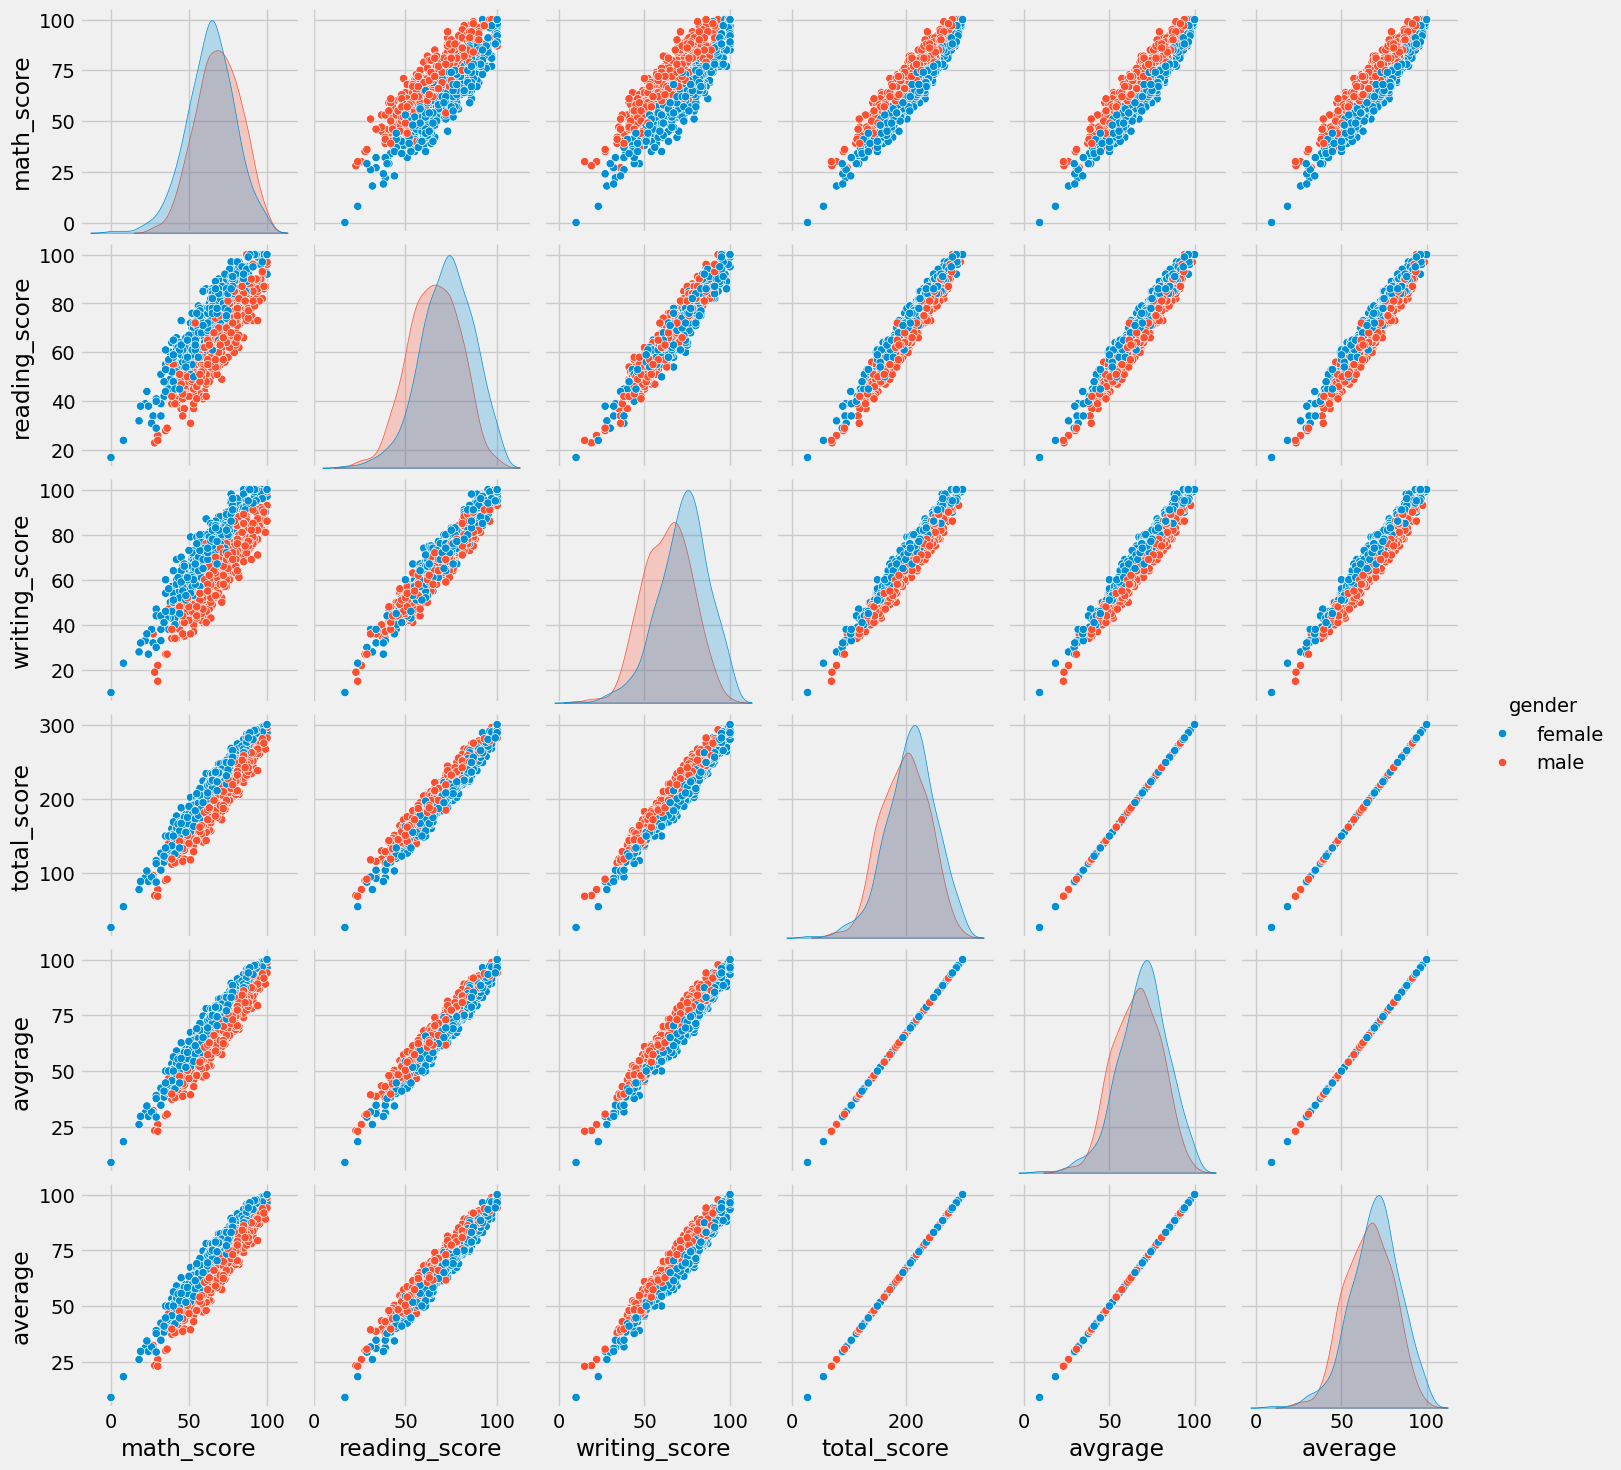

In [35]:
sns.pairplot(df,hue = 'gender')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.